# EDA task

## Let's analyze some penguin data :).

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("penguins.csv")

df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female


In [7]:
df_clean = df.dropna(subset=['bill_length_mm', 'flipper_length_mm', 'sex']) # 
print(df_clean.isnull().sum()) # Should be 0 for analysis columns
print(df_clean.species.value_counts()) # Check species balance: Adelie(146), Gentoo(119), Chinstrap(68)

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64
species
Adelie       146
Gentoo       119
Chinstrap     68
Name: count, dtype: int64


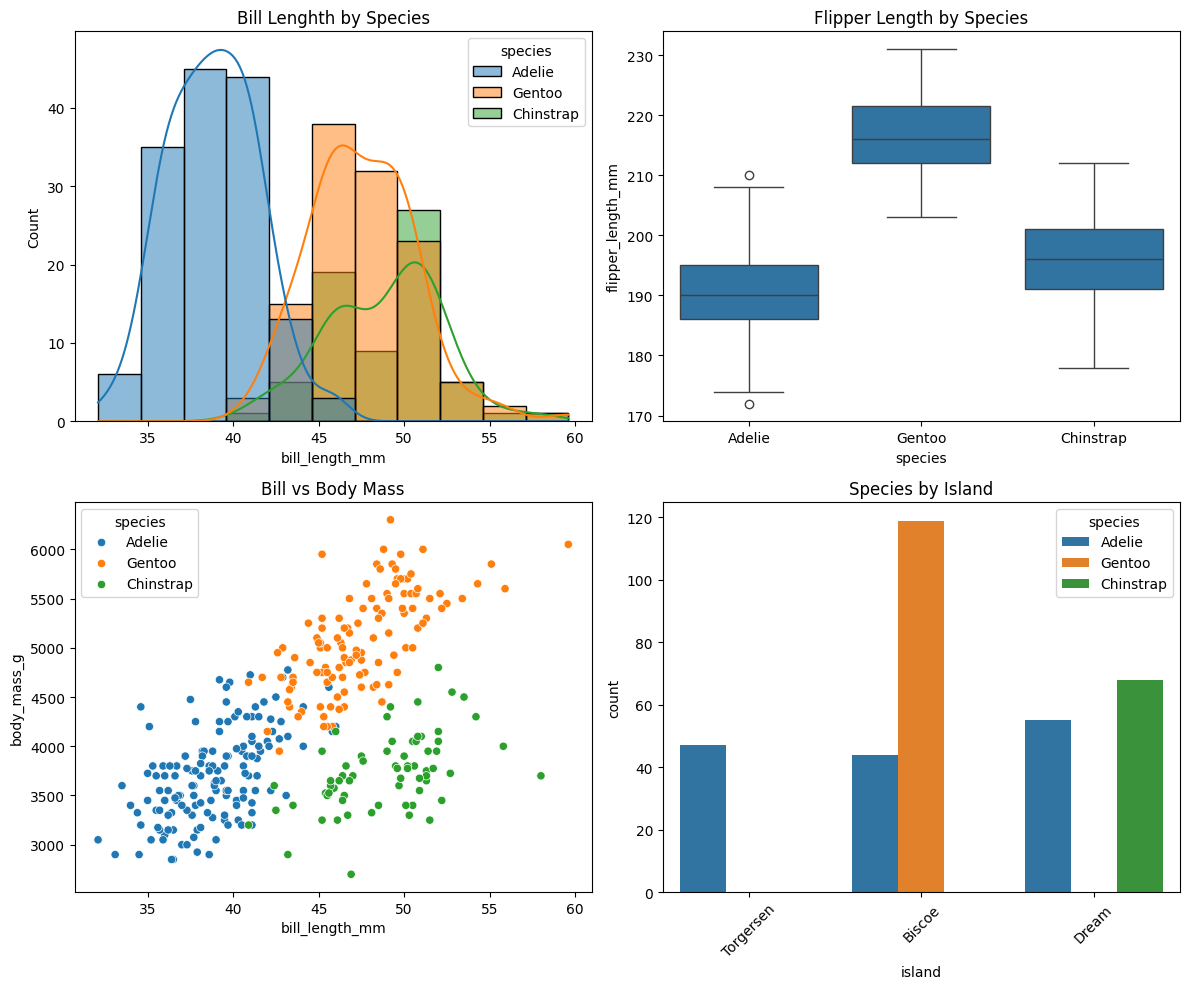

In [8]:
# 3. Visualizations (fill in)
fig, ax = plt.subplots(2, 2, figsize=(12,10))

# A) Histogram with KDE
sns.histplot(data=df_clean, x="bill_length_mm", hue="species", kde=True, ax=ax[0, 0])
ax[0,0].set_title("Bill Lenghth by Species")

# B) Boxplot
sns.boxplot(data=df_clean, x='species', y='flipper_length_mm',
ax=ax[0,1])
ax[0,1].set_title('Flipper Length by Species')

# C) Scatterplot
sns.scatterplot(data=df_clean, x='bill_length_mm',
y='body_mass_g', hue='species', ax=ax[1,0])
ax[1,0].set_title('Bill vs Body Mass')

# D) Countplot
sns.countplot(data=df_clean, x='island', hue='species',
ax=ax[1,1])
ax[1,1].set_title('Species by Island') # Rotate if overlapping:
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

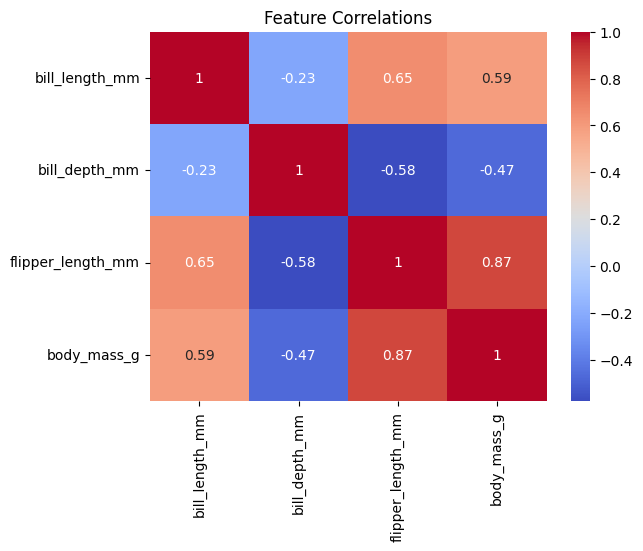

In [9]:
corr = df_clean[['bill_length_mm','bill_depth_mm','flipper_length_mm', 'body_mass_g']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Feature Correlations')
plt.show()

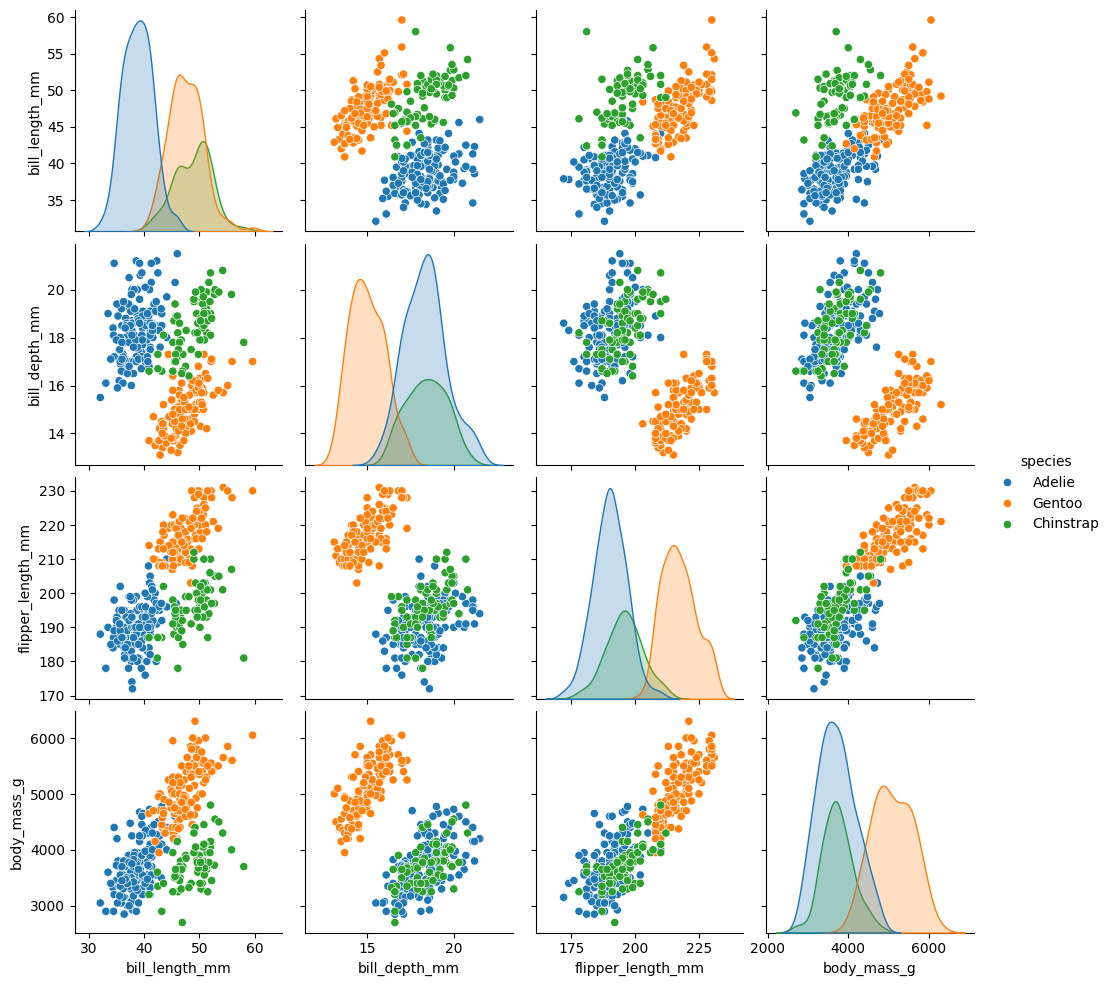

In [10]:
sns.pairplot(df_clean, hue="species")

### Observations and implications

**Insight 1:** based on the 4th graphic, we can conclude that the Adelie species can be found in every island in the dataset. <br>
**Insight 2:** based on the 2th graphic, the Gentoo species has overall a bigger flipper length and weight. <br>
**Insight 3:** based on the 1st and 2nd graphics, Adelie species have the smallest bill and flipper lengths.<br>

## Hypothesis

### **Hypothesis 1:** There is no difference in mean body mass between male and female penguins.

Text(0.5, 1.0, 'Hypothesis 1')

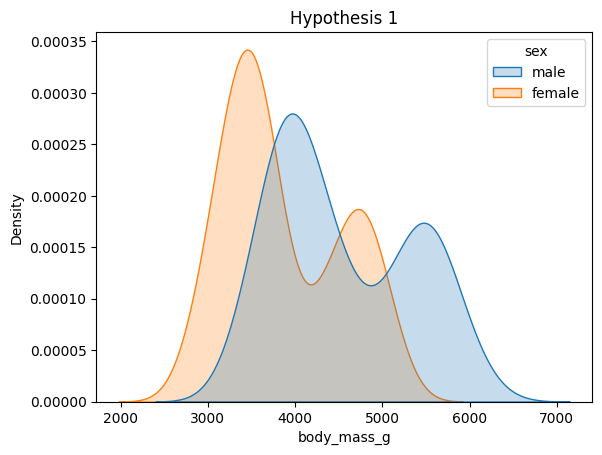

In [11]:
g1 = sns.kdeplot(data=df_clean, x="body_mass_g", hue="sex", fill=True)
g1.set_title("Hypothesis 1")

In [12]:
male_body_mass = df_clean[df_clean["sex"] == "male"]
female_body_mass = df_clean[df_clean["sex"] == "female"]
male_mean = np.mean(male_body_mass["body_mass_g"])
female_mean = np.mean(female_body_mass["body_mass_g"])

print(f"Male mean body mass in grams: {male_mean}")
print(f"Female mean body mass in grams: {female_mean}")

Male mean body mass in grams: 4545.684523809524
Female mean body mass in grams: 3862.2727272727275


As proven, we can conclude that there's a difference between the mean body mass of male and female penguins. <br>
Hence, the hypothesis holds false.

### **Hypothesis 2:** The flipper length has a positive impact on body mass. 

Text(0.5, 1.0, 'Hypothesis 2')

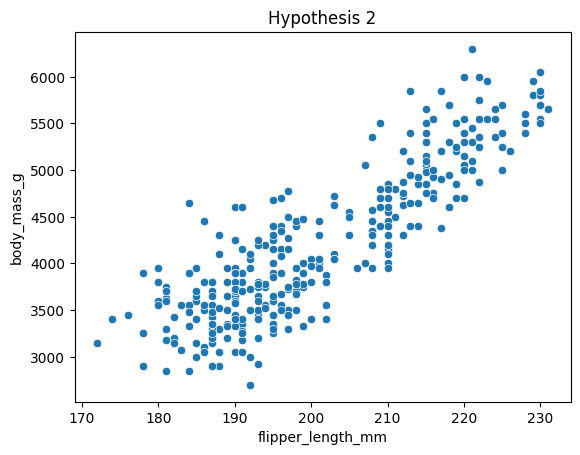

In [13]:
g2 = sns.scatterplot(data=df_clean, x='flipper_length_mm', y='body_mass_g')
g2.set_title("Hypothesis 2")

As we can see by the graph, the bigger the flipper length, the bigger the body mass. <br>
Hence, the hypothesis holds true.

### **Hypothesis 3:** The variance of body mass is equal across species.

Adelie species body weight variance: 208891.7948958529
Gentoo species body weight variance: 249365.06955723462
Chinstrap species body weight variance: 145541.1980968858


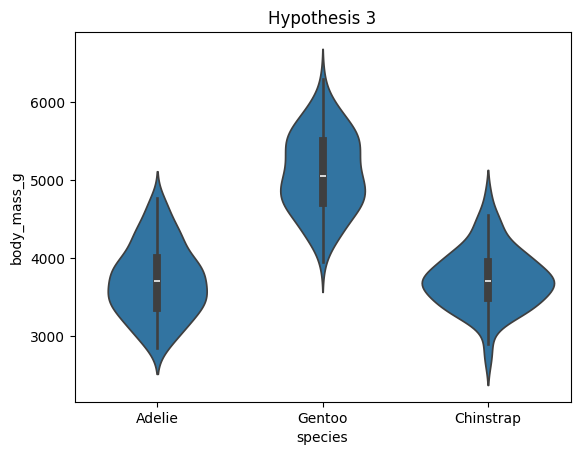

In [14]:
adelie = df_clean[df_clean["species"] == "Adelie"]
gentoo = df_clean[df_clean["species"] == "Gentoo"]
chinstrap = df_clean[df_clean["species"] == "Chinstrap"]

adelie_variance = np.var(adelie["body_mass_g"])
gentoo_variance = np.var(gentoo["body_mass_g"])
chinstrap_variance = np.var(chinstrap["body_mass_g"])

# color palette
palette = {
    "Adelie": "#1f77b4",     # blue
    "Gentoo": "#2ca02c",     # green
    "Chinstrap": "#ff7f0e"  # orange
}

g3 = sns.violinplot(data=df_clean, x="species", y="body_mass_g")

g3.set_title("Hypothesis 3")

print(f"Adelie species body weight variance: {adelie_variance}")
print(f"Gentoo species body weight variance: {gentoo_variance}")
print(f"Chinstrap species body weight variance: {chinstrap_variance}")

As we can see by the graph, the Gentoo violin is thinner and taller across the board, which demonstrates, as calculated, that it has a higher variance. <br>
Hence, the hypothesis holds false.